In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [2]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training3.csv")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
0,0.150095,0.342066,0.245505,0.823709,0.456088,0.456088,0.456088,0.0,0.456088,0.0,...,0.0,0.0,0.0,0.0,0.073461,0.444283,0.456088,0.440378,0.027335,208500
1,0.043704,0.309687,0.275454,0.858742,0.412917,0.412917,0.412917,0.0,0.206458,0.0,...,0.0,0.0,0.0,0.0,0.173726,0.400042,0.412917,0.398694,0.153434,181500
2,0.118371,0.270847,0.200518,0.890162,0.361130,0.000000,0.361130,0.0,0.361130,0.0,...,0.0,0.0,0.0,0.0,0.276877,0.347432,0.361130,0.348691,0.030301,223500
3,0.159663,0.311608,0.203805,0.859956,0.415478,0.000000,0.415478,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.066395,0.402442,0.415478,0.000000,0.453197,140000
4,0.094961,0.218296,0.199566,0.918118,0.291061,0.000000,0.291061,0.0,0.145531,0.0,...,0.0,0.0,0.0,0.0,0.297982,0.275967,0.291061,0.281036,0.027911,250000


In [3]:
corr=df.corr()

In [4]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
SalePrice,-0.187647,-0.404171,-0.150610,0.228495,-0.403474,-0.354273,-0.311037,-0.014314,-0.249109,-0.015982,...,0.041436,0.074595,0.079494,-0.039699,-0.220379,-0.415640,-0.375715,-0.190818,-0.581832,1.000000
Fireplaces,0.063249,0.007837,0.047980,-0.071319,0.006838,-0.066368,-0.018833,0.005340,0.010777,0.010396,...,0.005958,0.152924,0.031778,-0.011221,0.034248,0.000863,0.011667,0.074801,-0.139056,0.296401
MasVnrArea,0.226649,0.045938,0.020590,-0.232372,0.126856,0.070116,0.146934,0.039206,0.104347,-0.038813,...,0.008330,0.047443,-0.020110,-0.039165,0.070193,0.125313,0.093777,0.114912,-0.225699,0.286091
GarageArea,0.338253,0.162839,0.212572,-0.397094,0.355021,0.202603,0.348230,-0.012106,0.255043,-0.071831,...,0.002265,0.024850,-0.028577,-0.072354,0.234028,0.357993,0.259190,0.360551,-0.310870,0.250840
LotArea,-0.863094,-0.755708,-0.218895,1.000000,-0.917599,-0.639649,-0.765542,0.020686,-0.643130,0.009557,...,0.035842,0.031591,0.036059,-0.029195,-0.555556,-0.924604,-0.772368,-0.671901,-0.224720,0.228495
GarageCars,0.423849,0.232367,0.220673,-0.477601,0.425237,0.245790,0.398520,-0.011345,0.296085,-0.071124,...,0.003594,0.017486,-0.032757,-0.082006,0.277124,0.428144,0.324890,0.413761,-0.315702,0.219479
BsmtFinSF1,0.157114,0.096525,0.083294,-0.176603,0.153751,0.039327,0.138310,-0.021591,0.127488,0.063618,...,0.028868,0.072497,0.018856,-0.026515,0.129270,0.151753,0.132957,0.117896,-0.181597,0.209936
TotalBsmtSF,0.306169,0.325522,0.274670,-0.503970,0.455491,0.240865,0.399690,-0.029198,0.330091,-0.018536,...,0.010556,0.062309,-0.020677,-0.087436,0.313648,0.454333,0.346140,0.378087,-0.152333,0.208208
GrLivArea,0.602790,0.411877,0.242027,-0.653633,0.576926,0.373730,0.463320,-0.027909,0.391960,-0.025684,...,-0.018361,0.023221,-0.010039,-0.060111,0.392246,0.574364,0.469275,0.446161,0.065657,0.184438
OpenPorchSF,0.113680,-0.058095,0.053859,-0.105168,0.086041,0.032515,0.098391,0.014226,0.032429,-0.054175,...,-0.021118,0.019464,-0.009159,-0.024226,0.084887,0.083532,0.070389,0.097935,-0.142074,0.184272


In [5]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [6]:
model=SVR()

In [7]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [8]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'Fireplaces', 'MasVnrArea', 'GarageArea', 'LotArea',
       'GarageCars', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'OpenPorchSF'],
      dtype='object')

In [9]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,59546.499695,88648.696697,-0.024545
1,11,59547.866155,88648.845087,-0.024548
2,12,59545.905977,88648.103812,-0.024531
3,13,59544.642140,88647.730535,-0.024522
4,14,59545.296237,88648.634417,-0.024543
...,...,...,...,...
105,115,59533.909815,88633.140351,-0.024185
106,116,59533.909815,88633.140351,-0.024185
107,117,59533.909815,88633.140351,-0.024185
108,118,59533.909815,88633.140351,-0.024185


In [10]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
109,119,59533.909815,88633.140351,-0.024185
85,95,59533.909815,88633.140351,-0.024185
108,118,59533.909815,88633.140351,-0.024185
83,93,59533.909815,88633.140351,-0.024185
82,92,59533.909815,88633.140351,-0.024185
...,...,...,...,...
32,42,59553.616358,88653.469166,-0.024655
36,46,59553.676188,88653.245861,-0.024650
33,43,59553.722883,88653.553522,-0.024657
34,44,59553.835386,88653.693006,-0.024660


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_22484\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_22484\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


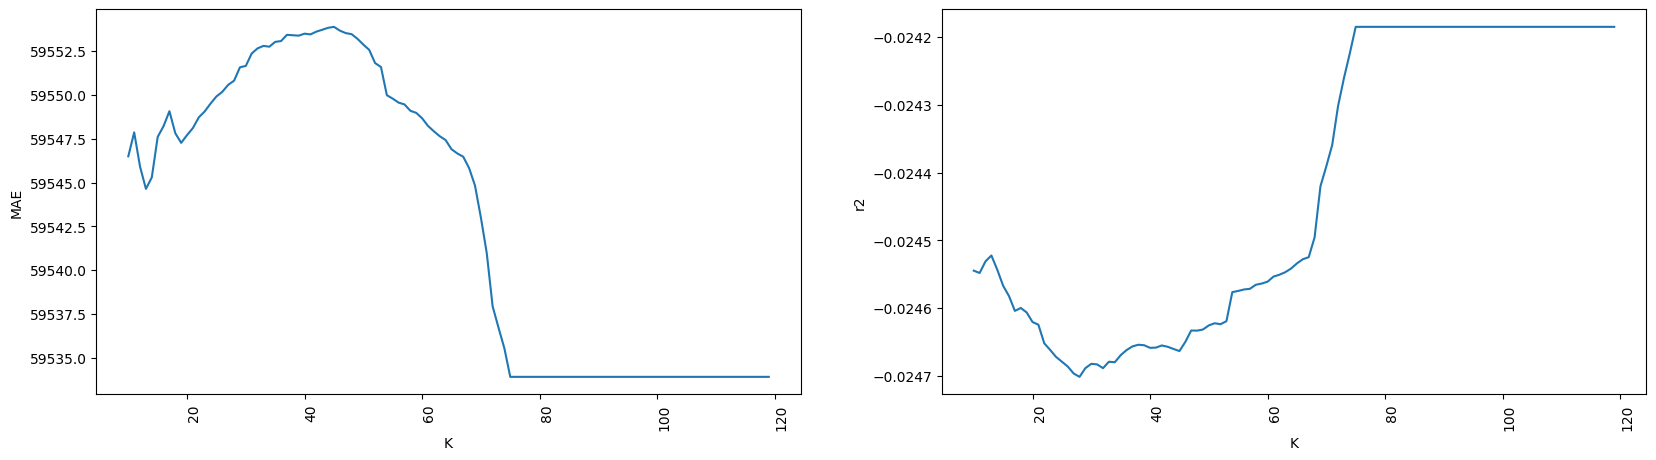

In [11]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [12]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass       3.261390e-02
MSZoning         2.602904e-02
LotFrontage      5.107889e-03
LotArea          2.617374e-02
Street           2.493119e-02
                     ...     
YrSold           2.532877e-02
SaleType         3.044613e-02
SaleCondition    3.442249e-02
Ageofhouse       3.430254e-02
SalePrice        6.306789e+09
Length: 75, dtype: float64

In [13]:
varr.loc[varr > 0.1].index

Index(['SalePrice'], dtype='object')

### 2.USING VarianceThreshold FROM SKLEARN

In [14]:
from sklearn.feature_selection import VarianceThreshold

In [15]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['SalePrice'], dtype='object')

In [16]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,59533.756374,88633.004203,-0.024182
1,101,59533.756374,88633.004203,-0.024182
2,102,59533.756374,88633.004203,-0.024182
3,103,59533.756374,88633.004203,-0.024182
4,104,59533.756374,88633.004203,-0.024182
...,...,...,...,...
395,495,59533.105106,88632.497420,-0.024170
396,496,59533.105106,88632.497420,-0.024170
397,497,59533.105106,88632.497420,-0.024170
398,498,59533.105106,88632.497420,-0.024170


In [17]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
399,499,59533.105106,88632.497420,-0.024170
302,402,59533.105106,88632.497420,-0.024170
303,403,59533.105106,88632.497420,-0.024170
304,404,59533.105106,88632.497420,-0.024170
305,405,59533.105106,88632.497420,-0.024170
...,...,...,...,...
27,127,59533.756374,88633.004203,-0.024182
26,126,59533.756374,88633.004203,-0.024182
25,125,59533.756374,88633.004203,-0.024182
34,134,59533.756374,88633.004203,-0.024182


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_22484\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_22484\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


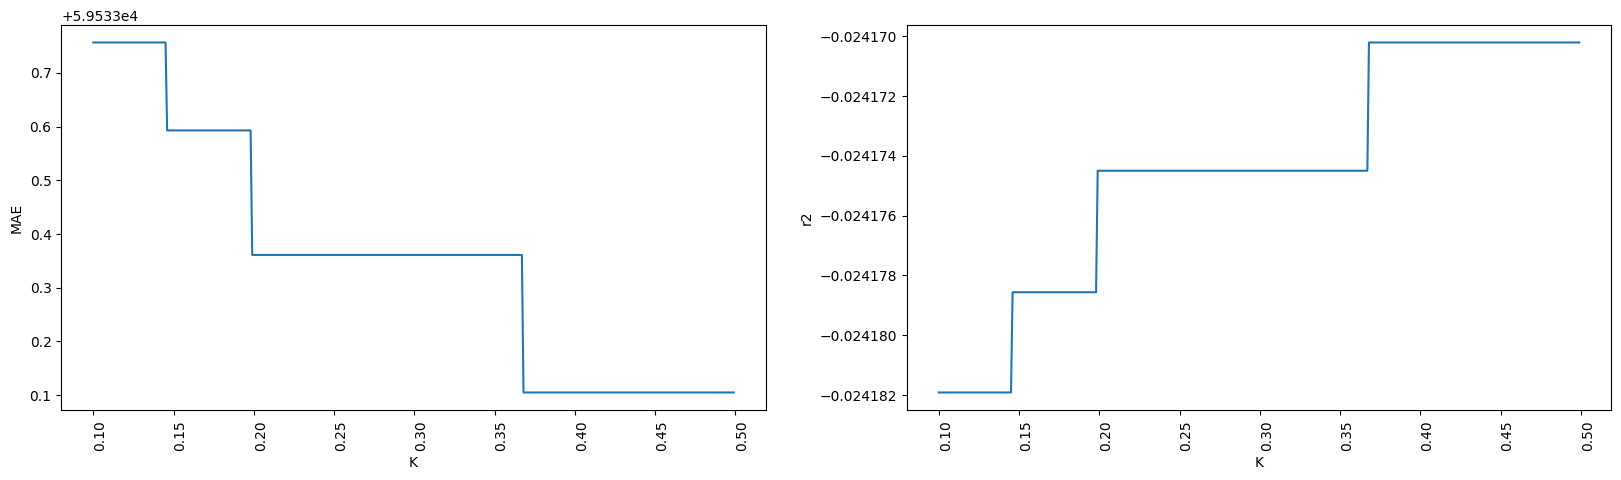

In [18]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


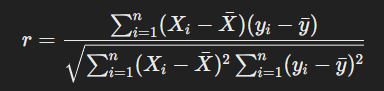

### Using numpy

In [19]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [20]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.030435711798881705


In [21]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

[]

### Using sklearn

In [22]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'Fireplaces', 'GarageCars',
       'GarageArea'], dtype=object)

In [23]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,59541.430283,88646.682427,-0.024498
1,6,59546.058608,88649.778477,-0.024570
2,7,59546.642272,88650.691274,-0.024591
3,8,59545.355022,88649.325223,-0.024559
4,9,59546.499695,88648.696697,-0.024545
...,...,...,...,...
110,115,59533.909815,88633.140351,-0.024185
111,116,59533.909815,88633.140351,-0.024185
112,117,59533.909815,88633.140351,-0.024185
113,118,59533.909815,88633.140351,-0.024185


In [24]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
114,119,59533.909815,88633.140351,-0.024185
87,92,59533.909815,88633.140351,-0.024185
86,91,59533.909815,88633.140351,-0.024185
85,90,59533.909815,88633.140351,-0.024185
84,89,59533.909815,88633.140351,-0.024185
...,...,...,...,...
36,41,59553.616358,88653.469166,-0.024655
40,45,59553.676188,88653.245861,-0.024650
37,42,59553.722883,88653.553522,-0.024657
38,43,59553.835386,88653.693006,-0.024660


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_22484\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_22484\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


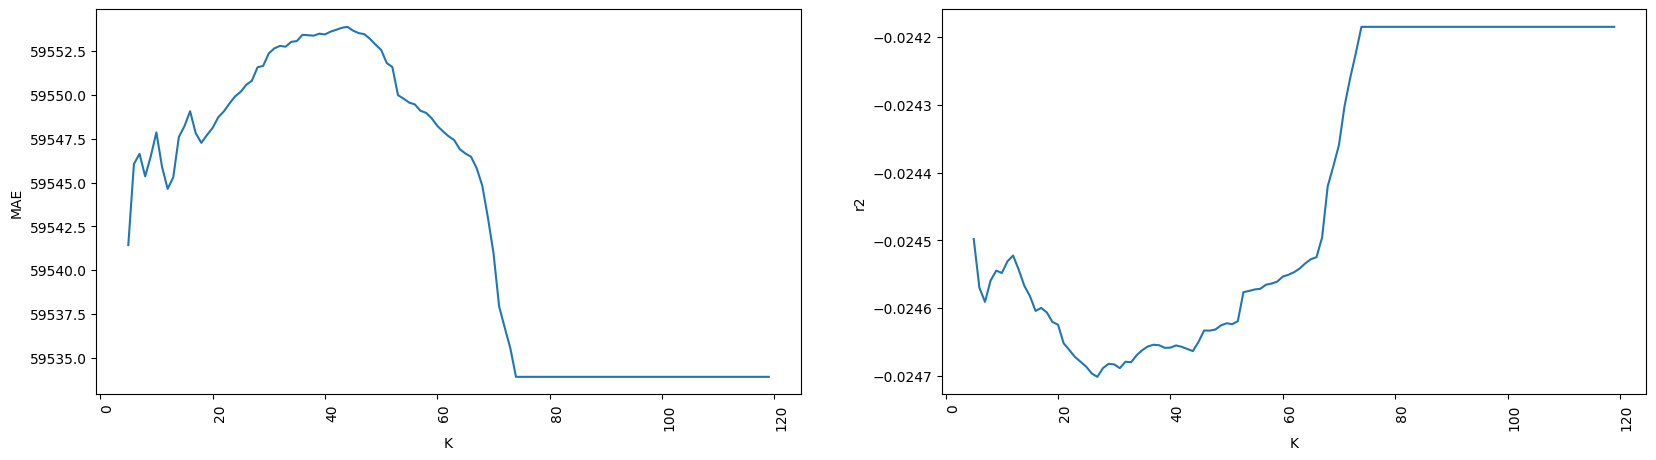

In [25]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

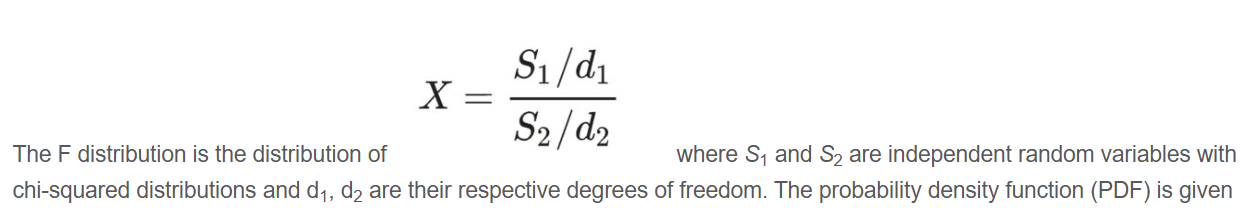

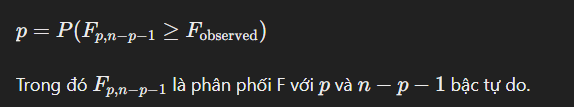

In [26]:
from sklearn.feature_selection import f_regression

In [27]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,59457.588892,88574.813047,-0.022838
1,6,59458.193633,88576.798630,-0.022883
2,7,59465.534181,88571.759059,-0.022767
3,8,59479.980057,88580.856419,-0.022977
4,9,59481.037698,88581.684180,-0.022996
...,...,...,...,...
110,115,59533.909815,88633.140351,-0.024185
111,116,59533.909815,88633.140351,-0.024185
112,117,59533.909815,88633.140351,-0.024185
113,118,59533.909815,88633.140351,-0.024185


In [28]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
0,5,59457.588892,88574.813047,-0.022838
1,6,59458.193633,88576.798630,-0.022883
2,7,59465.534181,88571.759059,-0.022767
3,8,59479.980057,88580.856419,-0.022977
4,9,59481.037698,88581.684180,-0.022996
...,...,...,...,...
86,91,59533.909815,88633.140351,-0.024185
113,118,59533.909815,88633.140351,-0.024185
88,93,59533.909815,88633.140351,-0.024185
79,84,59533.909815,88633.140351,-0.024185


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_22484\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_22484\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


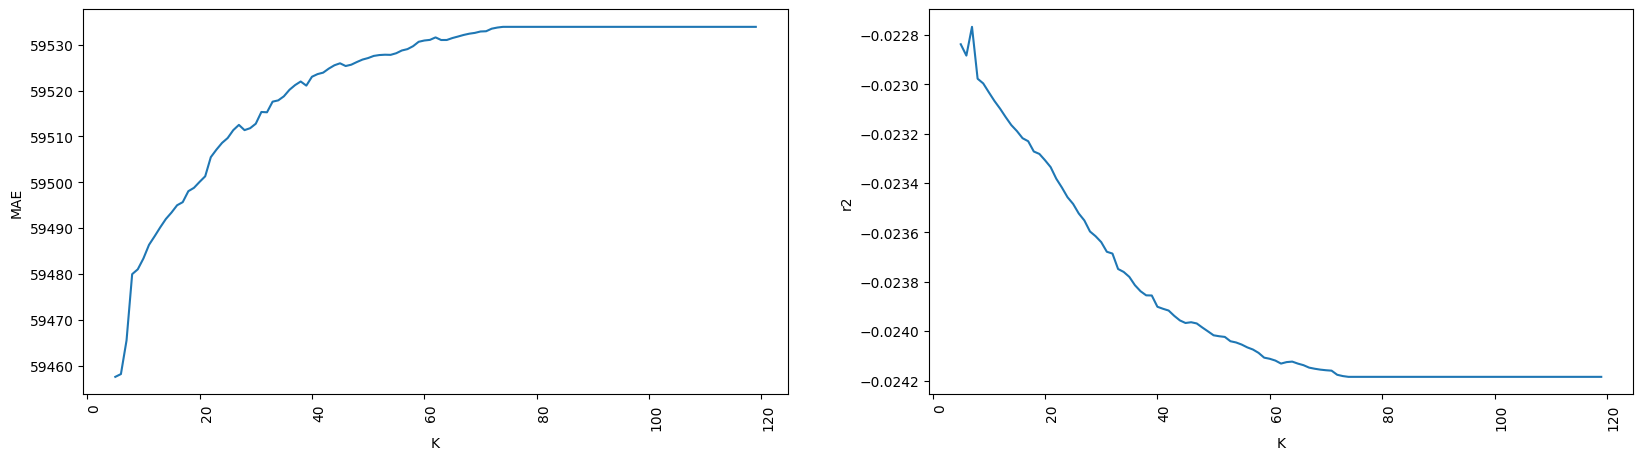

In [29]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

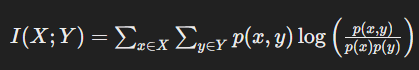

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

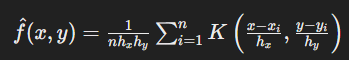

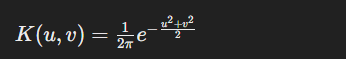

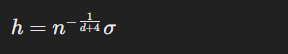

In [30]:
all_col=df.columns
all_col

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [31]:
from sklearn.feature_selection import mutual_info_regression

In [32]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,59457.588892,88574.813047,-0.022838
1,6,59458.193633,88576.798630,-0.022883
2,7,59469.001512,88584.907587,-0.023071
3,8,59473.925226,88589.376843,-0.023174
4,9,59477.387258,88591.962571,-0.023234
...,...,...,...,...
110,115,59533.909815,88633.140351,-0.024185
111,116,59533.909815,88633.140351,-0.024185
112,117,59533.909815,88633.140351,-0.024185
113,118,59533.909815,88633.140351,-0.024185


In [33]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [34]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
0,5,59457.588892,88574.813047,-0.022838
1,6,59458.193633,88576.798630,-0.022883
2,7,59469.001512,88584.907587,-0.023071
3,8,59473.925226,88589.376843,-0.023174
4,9,59477.387258,88591.962571,-0.023234
...,...,...,...,...
113,118,59533.909815,88633.140351,-0.024185
87,92,59533.909815,88633.140351,-0.024185
88,93,59533.909815,88633.140351,-0.024185
79,84,59533.909815,88633.140351,-0.024185


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_22484\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_22484\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


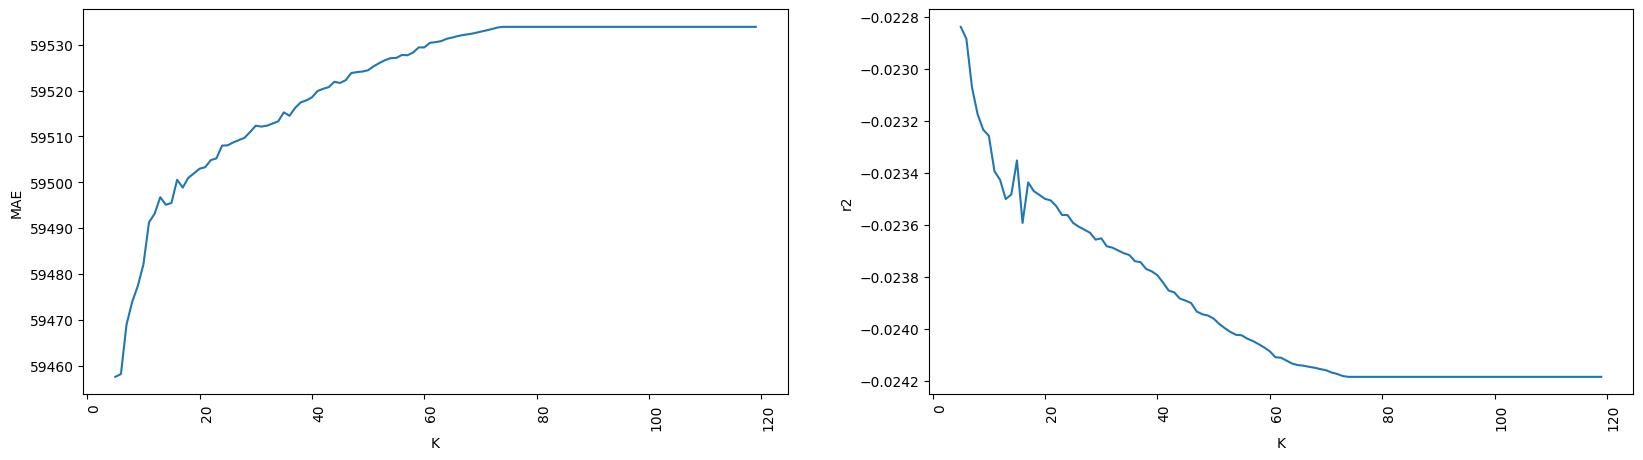

In [35]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [36]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,59495.845222,88608.456637,-0.023615
1,6,59498.153736,88612.535023,-0.023709
2,7,59505.235511,88614.688620,-0.023759
3,8,59506.338781,88613.407861,-0.023729
4,9,59478.549379,88599.895614,-0.023417
...,...,...,...,...
110,115,59525.030147,88633.651139,-0.024197
111,116,59525.061249,88633.671629,-0.024197
112,117,59525.091858,88633.691818,-0.024198
113,118,59525.121985,88633.711712,-0.024198


In [37]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,59391.310406,88502.976632,-0.021179
1,6,59392.614453,88502.867573,-0.021177
2,7,59416.413519,88543.177952,-0.022107
3,8,59428.324670,88550.242866,-0.022270
4,9,59435.796289,88553.982360,-0.022356
...,...,...,...,...
110,115,59518.893512,88626.183071,-0.024024
111,116,59519.279226,88626.564031,-0.024033
112,117,59519.333202,88626.610799,-0.024034
113,118,59519.481876,88626.735725,-0.024037


In [38]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,59457.588892,88574.813047,-0.022838
1,6,59458.193633,88576.798630,-0.022883
2,7,59469.001512,88584.907587,-0.023071
3,8,59473.925226,88589.376843,-0.023174
4,9,59477.387258,88591.962571,-0.023234
...,...,...,...,...
110,115,59533.909815,88633.140351,-0.024185
111,116,59533.909815,88633.140351,-0.024185
112,117,59533.909815,88633.140351,-0.024185
113,118,59533.909815,88633.140351,-0.024185


In [39]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,59495.845222,88608.456637,-0.023615,59391.310406,88502.976632,-0.021179
1,6,59498.153736,88612.535023,-0.023709,59392.614453,88502.867573,-0.021177
2,7,59505.235511,88614.688620,-0.023759,59416.413519,88543.177952,-0.022107
3,8,59506.338781,88613.407861,-0.023729,59428.324670,88550.242866,-0.022270
4,9,59478.549379,88599.895614,-0.023417,59435.796289,88553.982360,-0.022356
...,...,...,...,...,...,...,...
110,115,59525.030147,88633.651139,-0.024197,59518.893512,88626.183071,-0.024024
111,116,59525.061249,88633.671629,-0.024197,59519.279226,88626.564031,-0.024033
112,117,59525.091858,88633.691818,-0.024198,59519.333202,88626.610799,-0.024034
113,118,59525.121985,88633.711712,-0.024198,59519.481876,88626.735725,-0.024037


In [40]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,59495.845222,88608.456637,-0.023615,59391.310406,88502.976632,-0.021179,59457.588892,88574.813047,-0.022838
1,6,59498.153736,88612.535023,-0.023709,59392.614453,88502.867573,-0.021177,59458.193633,88576.798630,-0.022883
2,7,59505.235511,88614.688620,-0.023759,59416.413519,88543.177952,-0.022107,59469.001512,88584.907587,-0.023071
3,8,59506.338781,88613.407861,-0.023729,59428.324670,88550.242866,-0.022270,59473.925226,88589.376843,-0.023174
4,9,59478.549379,88599.895614,-0.023417,59435.796289,88553.982360,-0.022356,59477.387258,88591.962571,-0.023234
...,...,...,...,...,...,...,...,...,...,...
110,115,59525.030147,88633.651139,-0.024197,59518.893512,88626.183071,-0.024024,59533.909815,88633.140351,-0.024185
111,116,59525.061249,88633.671629,-0.024197,59519.279226,88626.564031,-0.024033,59533.909815,88633.140351,-0.024185
112,117,59525.091858,88633.691818,-0.024198,59519.333202,88626.610799,-0.024034,59533.909815,88633.140351,-0.024185
113,118,59525.121985,88633.711712,-0.024198,59519.481876,88626.735725,-0.024037,59533.909815,88633.140351,-0.024185


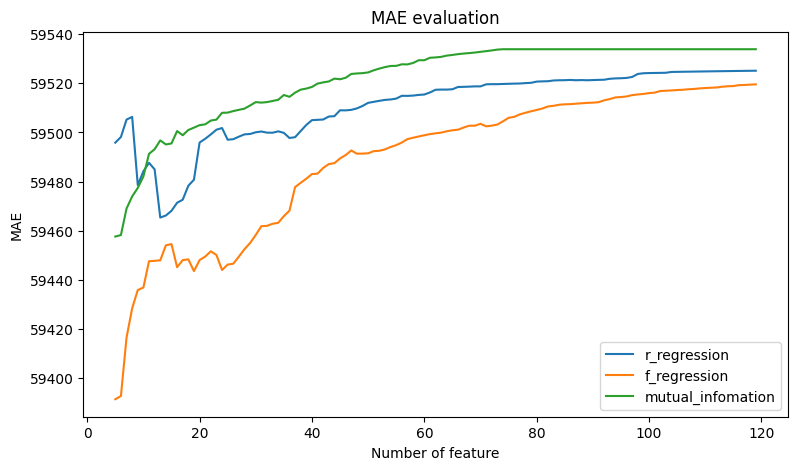

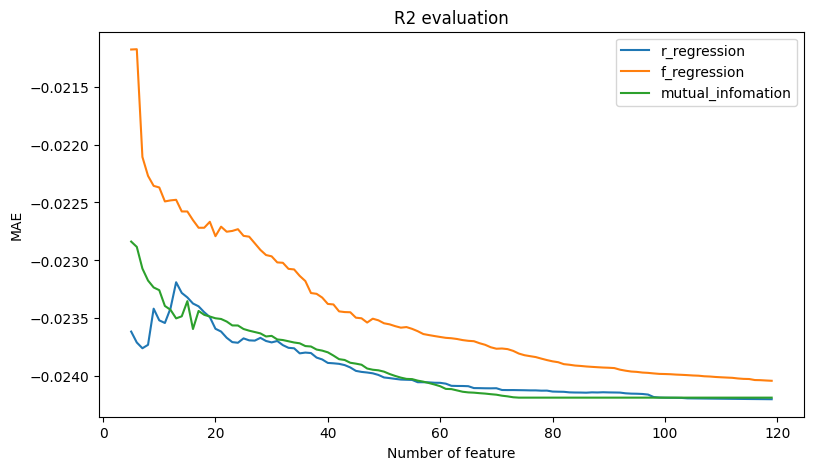

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()